<h2> Stat504 HW 3 </h2>
<h3> Part 1 </h3><br>
<b> University of Idhao </b><br>
<b> Fall 2015 </b> <br>
<b> Chung Yan Wan </b> <br>
<br> <br>
Data Set #1: STRONG-R Male Sample_Reduced_2014-03-14.csv (with variables description in  STRONG Codebook.xls). The response variable is FelRecidYr3 (1 versus 0) - Felony recidivism in 3 years.
<br> 
Data Set #1 Variables Description: www.webpages.uidaho.edu/~stevel/504/STRONG Codebook.xls
<br><br>
The common goal for both data sets is to successfully develop a model to predict the response variable given the other explanatory variables/features. Conduct a data analysis for the above Data Sets using all you have learned in the semester to cleanup, build, and  compare/contrast the performance (10-CV with AUC- measure) of various models (including variables/features selections, Null, 1) NB, 2) knn, 3) logistic regression, 4) SVM Polynomial kernel, 5) SVM Gaussian kernel, 6) Tree, 7) Bagging, 8) Random Forest, 9) Noisy Replications Ensembling, 10) plus one feasible model of your choice which was not covered in class). Overlay all model ROC curves in one figure for the same data set, with a legend key. Discuss your modeling process, interesting findings, and conclusions.

In [39]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import KFold
#this module cannot be imported on a Mac, so model 8 Voting Classifier can only be reproduced on Windows or Linux
from sklearn.ensemble import VotingClassifier  
from astropy.table import Table, Column

<h3> Import and clean up the data </h3>

In [7]:
dataset1 = pd.read_csv('/Users/chungyanwan/Desktop/Fall 2015/Stat504/hw3/STRONG-R Male Sample_Reduced_2014-03-14.csv')
#clean up the dataset
dataset1 = dataset1[dataset1.FelRecidYr3 != ' ' ]
dataset1.replace(' ',np.nan)
print dataset1.shape
dataset1.head()

(21373, 341)


,AgeAsses3RN,AgeAtFirstConvR,JvFelCon,JvVioCon,JvComit,HomConv,SexConv,VProCon,AssaCon,DomVio,...,CopFodNd3,CopBugNd3,CopTraNd3,CopHygNd3,CopMedNd3,CopMHNd3,FelRecidYr3,Unnamed: 338,Unnamed: 339,Unnamed: 340
0,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,NaN,NaN,NaN
3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,NaN,NaN,NaN
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


<h3> Set up a subsest which contains only the feature values and another subset which contains the target values</h3>

In [8]:
X = dataset1.drop(dataset1.columns[[337,338,339,340]], axis=1)
y = dataset1.FelRecidYr3.astype(int)

<h3> Select the 10 best features for later analysis </h3>

In [9]:
X_new = SelectKBest(chi2, k=10).fit_transform(X, y)
print X_new.shape
print X_new[0:10]
X_train, X_test, y_train, y_test = train_test_split(X_new, y, random_state=1234567)

(21373, 10)
[[0 0 0 2 0 0 0 0 0 0]
 [0 0 2 7 4 0 3 0 1 4]
 [0 0 0 1 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 3]
 [0 0 0 3 1 0 0 0 0 4]
 [0 0 0 2 3 0 0 0 0 0]
 [0 0 0 2 3 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0]
 [0 0 5 5 1 0 0 0 0 3]
 [0 0 5 5 1 0 0 0 0 3]]


<h3>Null Model</h3>

In [10]:
#null model and its accuracy
numpyMatrix = y.as_matrix()
recommit_yes = np.count_nonzero(numpyMatrix)
# total observation is 21373, and recommit_yes = 6514, so the null model is all zeros. 
ypred = np.zeros(21373)
null_score = 1.0 - 6514.0/21373.0
print ('Null model accuracy: %f' %null_score)
null_auc = metrics.roc_auc_score(y, ypred)
print ('Null model AUC: %f' %null_auc)

Null model accuracy: 0.695223
Null model AUC: 0.500000


<h3>Model 1: Gaussian Naive Bayes</h3>

In [11]:
# 10-fold cross-validation for GaussianNB 
start = time.time()
gnb = GaussianNB()
gnb_scores = cross_val_score(gnb, X_new, y, cv=10, scoring='accuracy')
# use average accuracy as an estimate of out-of-sample accuracy
print ("Gaussian NB average accracy: %f" %gnb_scores.mean())
gnb_auc = cross_val_score(gnb, X_new, y, cv=10, scoring='roc_auc')
print ("Gaussian NB AUC: %f" %gnb_auc.mean())
end = time.time()
gnb_time = end - start 
print ("Computation time (in second): %f"
      % gnb_time)

Gaussian NB average accracy: 0.691523
Gaussian NB AUC: 0.714434
Computation time (in second): 0.348387


<h3>Model 2: K Nearest Neighbors </h3>
<b>Find the optimal value of k for this model </b><br>

In [12]:
# search for an optimal value of K for KNN
# computational time about 15 minutes
start = time.time()
k_range = range(1, 100)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_new, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
end = time.time()
print ("Computation time: %f" % (end - start))

Computation time: 510.670338


Index of the best score:
(array([70]),)


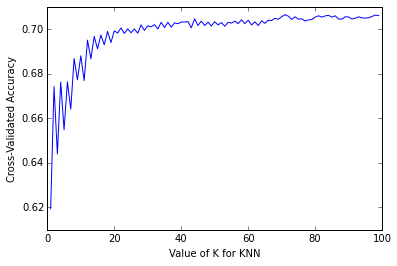

In [18]:
print "Index of the best score:" 
print np.where(k_scores == max(k_scores))
%matplotlib inline
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

<b>Find the average accuracy and AUC with 10-fold cross-validation for this model </b>

In [21]:
# 10-fold cross-validation with the optimaized k=71 for KNN (the n_neighbors parameter)
start = time.time()
knn = KNeighborsClassifier(n_neighbors=71 )
knn_scores = cross_val_score(knn, X_new, y, cv=10, scoring='accuracy')
# use average accuracy as an estimate of out-of-sample accuracy
print ("Knn average accuracy: %f" %knn_scores.mean())
knn_auc = cross_val_score(knn, X_new, y, cv=10, scoring='roc_auc')
print ("knn AUC: %f" %knn_auc.mean())
end = time.time()
knn_time = end - start 
print ("Computation time (in second): %f"
      % knn_time)

Knn average accuracy: 0.706401
knn AUC: 0.707841
Computation time (in second): 14.163990


<h3> Model 3: Logistcl Regression </h3>
<b> Find the average accuracy and AUC with 10-fold cross-validation for this model </b><br>
Computational time: 0.869257 sec

In [22]:
#10-fold cross-validation for logreg
start = time.time()
logreg = LogisticRegression(C=1e9)
logreg_scores = cross_val_score(logreg, X_new, y, cv=10, scoring='accuracy')
# use average accuracy as an estimate of out-of-sample accuracy
print ("Logistic regression average score: %f" %logreg_scores.mean())
logreg_auc = cross_val_score(logreg, X_new, y, cv=10, scoring='roc_auc')
print ("Logistic regression average score: %f" %logreg_auc.mean())
end = time.time()
logreg_time = end - start 
print ("Computation time (in second): %f" % logreg_time)

Logistic regression average score: 0.709677
Logistic regression average score: 0.719794
Computation time (in second): 0.871854


<h3> Model 4: SVM Polynomial kernel </h3>
<b>  Find the optimal value of gamma and C for this model </b>

In [ ]:
# try search for an optimal value of gamma and c for SVM polymail
# computation time takes more than 3 hour and still.....not finshed.
start = time.time()
gamma_range = [.1,1]
c_range = [1,5]
gc1_scores = np.empty(shape=[2,2])
for g in gamma_range:
    for c in c_range:
        svm_poly = svm.SVC(C=c, kernel='poly', gamma=g)
        scores = cross_val_score(svm_poly, X_new, y, cv=10, scoring='accuracy')
        gcl_scores.append(scores.mean())
end = time.time()
print ("Computation time: %f"% (end - start)

<b> Find the average accuracy and AUC with 10-fold cross-validation for this model </b>

In [ ]:
#10-fold cross-validation for SVM poly
start = time.time()
svm_poly = svm.SVC(kernel='poly')
svm1_scores = cross_val_score(svm_poly, X_new, y, cv=10, scoring='accuracy')
# use average accuracy as an estimate of out-of-sample accuracy
print ("Logistic regression average score: %f" %svm1_scores.mean())
svm1_auc = cross_val_score(svm_poly, X_new, y, cv=10, scoring='roc_auc')
print ("Logistic regression average score: %f" %svm1_auc.mean())
end = time.time()
svm1_time = end - start 
print ("Computation time (in second): %f" % svm1_time)

<h3> Model 5: SVM Gaussian kernel </h3>
<b>  Find the optimal value of gamma for this model </b>

In [ ]:
# search for an optimal value of gamma for rbf
start = time.time()
gamma_range = [.1,1,10]
gamma_scores = []
for g in gamma_range:
    svm_rbf = svm.SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svm_rbf, X_new, y, cv=10, scoring='accuracy')
    gamma_scores.append(scores.mean())
end = time.time()
print ("Computational time: %f"
      % end - start)
end = time.time()
print ("Computational time: %f"
      % end - start)

<b> Find the average accuracy and AUC with 10-fold cross-validation for this model </b>

In [ ]:
#10-fold cross-validation for SVM Gaussian
start = time.time()
svm_rbf = svm.SVC(kernel='rbf')
svm2_scores = cross_val_score(svm_rbf, X_new, y, cv=10, scoring='accuracy')
# use average accuracy as an estimate of out-of-sample accuracy
print ("Logistic regression average score: %f" %svm2_scores.mean())
svm2_auc = cross_val_score(svm_rbf, X_new, y, cv=10, scoring='roc_auc')
print ("Logistic regression average score: %f" %svm2_auc.mean())
end = time.time()
svm2_time = end - start 
print ("Computation time (in second): %f" % svm2_time)

<h3> Model 6: Decision Tree Classifier </h3>
<b>Find the optimal value of max_depth for this model</b>

In [25]:
# search for an optimal value of max_depth for treeclf
#Computational time : 2.682108 sec
start = time.time()
d_range = range(1,20)
d_scores = []
for d in d_range:
    treeclf = DecisionTreeClassifier(max_depth=d)
    scores = cross_val_score(treeclf, X_new, y, cv=10, scoring='accuracy')
    d_scores.append(scores.mean())
end = time.time()
print ("Computation time : %f" % (end - start))
print "Index of the best score:" 
np.where(d_scores == max(d_scores))

Computation time : 6.517186
Index of the best score:


(array([5]),)

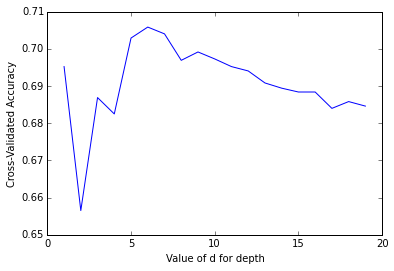

In [26]:
%matplotlib inline
# plot the value of d for treeclf (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(d_range, d_scores)
plt.xlabel('Value of d for depth')
plt.ylabel('Cross-Validated Accuracy')

<b> Find the average accuracy and AUC with 10-fold cross-validation for this model </b>

In [28]:
# 10-fold cross-validation for Decision Tree with the optimal max depth (previously found max_depth=6)
start = time.time()
treeclf = DecisionTreeClassifier(max_depth = 6)
treeclf_scores = cross_val_score(treeclf, X_new, y, cv=10, scoring='accuracy').mean()
# use average accuracy as an estimate of out-of-sample accuracy
print ("Decision Tree average scores: %f" % treeclf_scores.mean())
treeclf_auc = cross_val_score(treeclf, X_new, y, cv=10, scoring='roc_auc')
print ("Decision Tree AUC: %f" % treeclf_auc.mean())
end = time.time()
treeclf_time = end - start
print ("Computation time (in second): %f"
      % treeclf_time)

Decision Tree average scores: 0.705840
Decision Tree AUC: 0.705792
Computation time (in second): 0.604750


<h3> Model 7: Ensemble Bagging </h3>
<b>Find the optimal values of n_estimator and max_sample for this model</b>

In [31]:
# search for an optimal values of n_estimator and max_samples for bagging
start = time.time()
est_range = range(1,21)  
sam_range = range(100,2001,100)
est_scores = np.empty(shape=[20,20])
i = 0
for est in est_range:
    for sam in sam_range:
        bag = BaggingClassifier(n_estimators=est, max_samples=sam)
        scores = cross_val_score(bag, X_new, y, cv=10, scoring='accuracy')
        est_scores[est-1, i] = scores.mean()
        i = i+1
    i = 0
end = time.time()
print ("Computation time : %f" % (end - start))
#found the indices of the array where it contains the greatest value of accuracy
#they will be the optimal n_estimator and max_samples
np.where(est_scores == est_scores.max()) 

Computation time : 286.064259


(array([19]), array([5]))

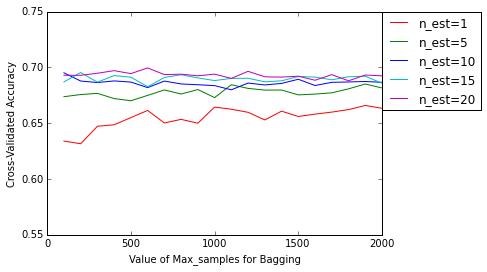

In [33]:
%matplotlib inline
# plot the value of max_samples for bagging (x-axis) versus the cross-validated accuracy (y-axis)
# each line represents a different value of n_estimators
plt.plot(sam_range, est_scores[0,:],'r', label ='n_est=1')
plt.plot(sam_range, est_scores[4,:],'g',label = 'n_est=5')
plt.plot(sam_range, est_scores[9,:],'b',label = 'n_est=10')
plt.plot(sam_range, est_scores[14,:],'c', label ='n_est=15')
plt.plot(sam_range, est_scores[19,:],'m',label = 'n_est=20')
plt.ylim([0.55, 0.75])
plt.xlabel('Value of Max_samples for Bagging')
plt.ylabel('Cross-Validated Accuracy')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

<b> Find the average accuracy and AUC with 10-fold cross-validation for this model </b>

In [34]:
# 10-fold cross-validation for Bagging
# previously found best n_estimator approx. = 20, max_sample = 600
start = time.time()
bag = BaggingClassifier(n_estimators=20, max_samples=600, max_features=1.0)
bag_scores = cross_val_score(bag, X_new, y, cv=10, scoring='accuracy').mean()
# use average accuracy as an estimate of out-of-sample accuracy
print ("Bagging average scores: %f" % bag_scores.mean())
bag_auc = cross_val_score(bag, X_new, y, cv=10, scoring='roc_auc')
print ("Bagging AUC: %f" % bag_auc.mean())
end = time.time()
bag_time = end - start
print ("Computation time (in second): %f"
      % bag_time)

Bagging average scores: 0.694189
Bagging AUC: 0.691882
Computation time (in second): 2.338875


<h3> Model 8: Ensemble Random Forest </h3>
<b>Find the optimal values of n_estimator and max_depth for this model</b>

In [37]:
# search for an optimal values of n_estimator and max_depth for Random Forest Classifier 
# Computational time : 582.664212
start = time.time()
est_range = range(1,21)
dep_range = range(1,21)
est2_scores = np.empty(shape=[20,20])
for est in est_range:
    for dep in dep_range:
        rfc = RandomForestClassifier(n_estimators=est, max_depth=dep)
        rfc_scores = cross_val_score(rfc, X_new, y, cv=10, scoring='accuracy')
        est2_scores[est-1, dep-1] = rfc_scores.mean()
end = time.time()
print ("Computation time : %f" % (end - start))
#found the indices of the array where it contains the greatest value of accuracy
#they will be the optimal n_estimator and max_samples
np.where(est2_scores == est2_scores.max()) 

Computation time : 440.046875


(array([14]), array([6]))

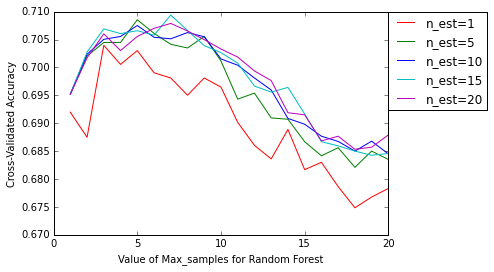

In [41]:
%matplotlib inline
# plot the value of max_samples for bagging (x-axis) versus the cross-validated accuracy (y-axis)
# each line represents a different value of n_estimators
plt.plot(dep_range, est2_scores[0,:],'r', label ='n_est=1')
plt.plot(dep_range, est2_scores[4,:],'g',label = 'n_est=5')
plt.plot(dep_range, est2_scores[9,:],'b',label = 'n_est=10')
plt.plot(dep_range, est2_scores[14,:],'c', label ='n_est=15')
plt.plot(dep_range, est2_scores[19,:],'m',label = 'n_est=20')
plt.xlabel('Value of Max_samples for Random Forest')
plt.ylabel('Cross-Validated Accuracy')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

<b> Find the average accuracy and AUC with 10-fold cross-validation for this model </b>

In [42]:
# 10-fold cross-validation for Random Forest Classifier 
# previously found optimal n_estimators =  max_depth = 
start = time.time()
rfc = RandomForestClassifier(n_estimators=15, max_depth=7)
rfc_scores = cross_val_score(rfc, X_new, y, cv=10, scoring='accuracy').mean()
# use average accuracy as an estimate of out-of-sample accuracy
print ("Rondom Forest Classifier average scores: %f" % rfc_scores.mean())
rfc_auc = cross_val_score(rfc, X_new, y, cv=10, scoring='roc_auc')
print ("Rondom Forest Classifier AUC: %f" % rfc_auc.mean())
end = time.time()
rfc_time = end - start
print ("Computation time (in second): %f"
      % rfc_time)

Rondom Forest Classifier average scores: 0.706683
Rondom Forest Classifier AUC: 0.719615
Computation time (in second): 2.587279


<h3> Model 9: Voting Classifier </h3>

In [6]:
# 10-fold cross-validation for Voting Classifier 
# previously found optimal n_estimators = 12 max_depth = 7
start = time.time()
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')
vc_scores = cross_val_score(eclf, X_new, y, cv=10, scoring='accuracy').mean()
# use average accuracy as an estimate of out-of-sample accuracy
print ("Voting Classifier average scores: %f" % vc_scores.mean())
vc_auc = cross_val_score(eclf, X_new, y, cv=10, scoring='roc_auc')
print ("Voting Classifier AUC: %f" % vc_auc.mean())
end = time.time()
vc_time = end - start
print ("Computational time (in second): %f"
      % vc_time)

Voting Classifier average scores: 0.701815
Voting Classifier AUC: 0.708787
Computational time (in second): 4.943000


<h3>AUC, Computational Time, and ROC </h3>

Gaussian Naive Bayes AUC:  0.714141156932
Computational time: 0.015000
Logistic Regression AUC:  0.722812874322
Computational time: 0.032000
Knn AUC:  0.713481906443
Computational time: 1.422000
SVM Polynomial Kernal AUC:  0.694191010749
Computational time: 1052.504000
SVM Gaussian Kernel AUC:  0.643961557759
Computational time: 73.586000
Decision Tree AUC:  0.711603892164
Computational time: 0.016000
Bagging AUC:  0.70106910055
Computational time: 0.160000
Random Forest AUC:  0.725363273205
Computational time: 0.100000
Voting Classifier AUC:  0.716339233178
Computational time: 0.179000


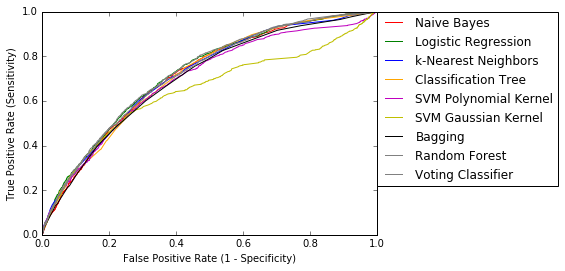

In [21]:
%matplotlib inline
start1 = time.time()
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_y_pred_prob = gnb.predict_proba(X_test)[:, 1]
gnb_fpr, gnb_tpr, gnb_thresholds = metrics.roc_curve(y_test, gnb_y_pred_prob)
print 'Gaussian Naive Bayes AUC: ', metrics.roc_auc_score(y_test, gnb_y_pred_prob)
end1 = time.time()
run1 = end1 - start1
print ("Computational time: %f" %run1 )

start2 = time.time()
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train,y_train)
lr_y_pred_prob = logreg.predict_proba(X_test)[:, 1]
lr_fpr, lr_tpr, lr_thresholds = metrics.roc_curve(y_test, lr_y_pred_prob)
print 'Logistic Regression AUC: ', metrics.roc_auc_score(y_test, lr_y_pred_prob)
end2 = time.time()
print ('Computational time: %f' %(end2-start2))

start3 = time.time()
knn = KNeighborsClassifier(n_neighbors=72 )
knn.fit(X_train,y_train)
knn_y_pred_prob = knn.predict_proba(X_test)[:, 1]
knn_fpr, knn_tpr, knn_thresholds = metrics.roc_curve(y_test, knn_y_pred_prob)
print 'Knn AUC: ', metrics.roc_auc_score(y_test, knn_y_pred_prob)
end3 = time.time()
print ('Computational time: %f' %(end3-start3))

start4 = time.time()
svm_poly = svm.SVC(kernel='poly',probability=True)
svm_poly.fit(X_train,y_train)
svm1_y_pred_prob = svm_poly.predict_proba(X_test)[:, 1]
svm1_fpr, svm1_tpr, svm1_thresholds = metrics.roc_curve(y_test, svm1_y_pred_prob)
print 'SVM Polynomial Kernal AUC: ', metrics.roc_auc_score(y_test, svm1_y_pred_prob)
end4 = time.time()
print ('Computational time: %f' %(end4-start4))

start5 = time.time()
svm_rbf = svm.SVC(kernel='rbf',probability=True)
svm_rbf.fit(X_train,y_train)
svm2_y_pred_prob = svm_rbf.predict_proba(X_test)[:, 1]
svm2_fpr, svm2_tpr, svm2_thresholds = metrics.roc_curve(y_test, svm2_y_pred_prob)
print 'SVM Gaussian Kernel AUC: ', metrics.roc_auc_score(y_test, svm2_y_pred_prob)
end5 = time.time()
print ('Computational time: %f' %(end5-start5))

start6 = time.time()
treeclf = DecisionTreeClassifier(max_depth = 6)
treeclf.fit(X_train,y_train)
ct_y_pred_prob = treeclf.predict_proba(X_test)[:, 1]
ct_fpr, ct_tpr, ct_thresholds = metrics.roc_curve(y_test, ct_y_pred_prob)
print 'Decision Tree AUC: ', metrics.roc_auc_score(y_test, ct_y_pred_prob)
end6 = time.time()
print ('Computational time: %f' %(end6-start6))

start7 = time.time()
bag = BaggingClassifier(n_estimators=33, max_samples=9, max_features=1.0)
bag.fit(X_train,y_train)
bag_y_pred_prob = bag.predict_proba(X_test)[:, 1]
bag_fpr, bag_tpr, bag_thresholds = metrics.roc_curve(y_test, bag_y_pred_prob)
print 'Bagging AUC: ', metrics.roc_auc_score(y_test, bag_y_pred_prob)
end7 = time.time()
print ('Computational time: %f' %(end7-start7))

start8 = time.time()
rfc = RandomForestClassifier(n_estimators=12, max_depth=7)
rfc.fit(X_train,y_train)
rf_y_pred_prob = rfc.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, rf_thresholds = metrics.roc_curve(y_test, rf_y_pred_prob)
print 'Random Forest AUC: ', metrics.roc_auc_score(y_test, rf_y_pred_prob)
end8 = time.time()
print ('Computational time: %f' %(end8-start8))

start9 = time.time()
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')
eclf.fit(X_train,y_train)
vc_y_pred_prob = eclf.predict_proba(X_test)[:, 1]
vc_fpr, vc_tpr, vc_thresholds = metrics.roc_curve(y_test, vc_y_pred_prob)
print 'Voting Classifier AUC: ', metrics.roc_auc_score(y_test, vc_y_pred_prob)
end9 = time.time()
print 'Computational time: %f' %(end9-start9)

plt.plot(gnb_fpr, gnb_tpr, 'r', label ='Naive Bayes')
plt.plot(lr_fpr, lr_tpr, 'g', label ='Logistic Regression')
plt.plot(knn_fpr, knn_tpr, 'b', label ='k-Nearest Neighbors')
plt.plot(ct_fpr, ct_tpr, 'orange', label = 'Classification Tree')
plt.plot(svm1_fpr, svm1_tpr, 'm', label ='SVM Polynomial Kernel')
plt.plot(svm2_fpr, svm2_tpr, 'y', label ='SVM Gaussian Kernel')
plt.plot(bag_fpr, bag_tpr, 'k', label ='Bagging')
plt.plot(rf_fpr, rf_tpr, 'gray', label ='Random Forest')
plt.plot(vc_fpr, vc_tpr, 'purple', label ='Voting Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

<b> Logistic Regression and Random Forest yeild the greatest AUC!</b><br><br>

In [45]:
arr = np.array([['Null', 0.695223,0.500000,0.500000,''],
                ['Bernoulli NB', 0.691523,0.714434, 0.714141156932, 0.015000],
                ['Knn',0.706401,0.707841, 0.713481906443,1.422000],
               ['Log. Reg.', 0.709677, 0.719794,0.722812874322, 0.032000],
                ['SVM Poly', 0.706684, 0.682009,0.694191010749, 1052.504000 ],
                ['SVM Gaussian0', 0.706729,  0.634496, 0.643961557759, 73.586000],
                ['Decision Tree', 0.705840, 0.705792,0.711603892164,  0.016000],
                ['Bagging', 0.694189, 0.691882,0.70106910055, 0.160000],
                ['Random Forest',0.706683, 0.719615,0.725363273205, 0.100000],
                ['Voting Classifier', 0.701815,0.708787,0.716339233178, 0.179000]])
#The values of AUC were gotten from one train-and-test model computation
#Computation time were gotten from one train-and-test model computation
t = Table(arr, names = ('Model','CV Accuracy', 'CV AUC', 'AUC', 'Comput. time'))
print t 

      Model       CV Accuracy  CV AUC       AUC       Comput. time
----------------- ----------- -------- -------------- ------------
             Null    0.695223      0.5            0.5             
     Bernoulli NB    0.691523 0.714434 0.714141156932        0.015
              Knn    0.706401 0.707841 0.713481906443        1.422
        Log. Reg.    0.709677 0.719794 0.722812874322        0.032
         SVM Poly    0.706684 0.682009 0.694191010749     1052.504
    SVM Gaussian0    0.706729 0.634496 0.643961557759       73.586
    Decision Tree     0.70584 0.705792 0.711603892164        0.016
          Bagging    0.694189 0.691882  0.70106910055         0.16
    Random Forest    0.706683 0.719615 0.725363273205          0.1
Voting Classifier    0.701815 0.708787 0.716339233178        0.179
